In [1]:
#This project has been worked in conjunction with the guidance found in the 
#Recording and Coding Guide for the Structure Inventory and Appraisal of the Nations Bridges on the FHWA website
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
current_year = 2017

In [2]:
filedata = pd.read_csv('GA17.txt')
#drop all culverts from the dataset, we only want to analyze bridges
data = filedata.loc[filedata['CULVERT_COND_062']=='N']
num_bridges = data.shape[0]
num_features_orig = data.shape[1]
feature_list = []
print('Number of Bridges in Georgia (2017):',num_bridges)
print('Number of data_bridgeset Features:',num_features_orig)

Number of Bridges in Georgia (2017): 9198
Number of data_bridgeset Features: 137


/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,5,31,75,98) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Interestingly, the GDOT website says that there are 14,750 bridges in Georgia as of 2018. There definition must include culverts to some extent.

In [3]:
data.head(10)

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,CAT10,CAT23,CAT29
0,13,1GA3906,1,8,8,0,0,0,39,0,...,NaN,NaN,NaN,0,NaN,93.0,0,G,7,404.68
1,13,1GA3988,1,6,0,0,0,0,39,0,...,NaN,NaN,NaN,0,NaN,84.0,0,F,6,34.84
2,13,1GA4976,1,8,0,0,0,0,39,0,...,NaN,NaN,NaN,0,NaN,71.3,0,F,5,265.32
3,13,2GA1475,1,8,8,0,0,0,95,1052,...,NaN,NaN,NaN,2,NaN,49.0,2,F,6,190.19
4,13,2GA1802,1,8,8,0,0,0,95,1052,...,NaN,NaN,NaN,1,NaN,49.1,1,P,4,117.42
6,13,000000000000036,1,8,1,0,0,0,53,30760,...,NaN,NaN,NaN,2,*,94.9,2,F,6,354.54
8,13,000000000000045,1,8,1,0,0,0,53,30760,...,NaN,NaN,NaN,0,NaN,94.6,0,F,5,106.86
9,13,0000000000M9352,1,8,1,0,0,0,53,30760,...,NaN,NaN,NaN,0,NaN,98.0,0,F,6,515.20
10,13,0000000000M9354,1,8,1,0,0,0,215,30760,...,NaN,NaN,NaN,0,*,97.0,0,F,5,441.62
11,13,0000000000M9355,1,8,1,0,0,0,215,30760,...,NaN,NaN,NaN,0,NaN,93.0,0,F,6,1232.64


In [4]:
data['SUFFICIENCY_RATING'].describe()

count    9198.000000
mean       77.085258
std        19.635620
min         0.000000
25%        65.900000
50%        81.050000
75%        93.700000
max       100.000000
Name: SUFFICIENCY_RATING, dtype: float64

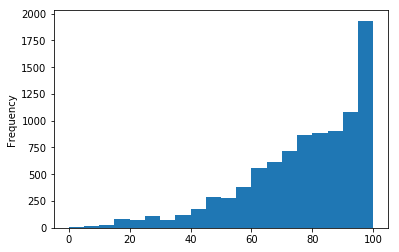

In [5]:
data['SUFFICIENCY_RATING'].plot(kind='hist',bins=20)
plt.show()

In [6]:
perc_atorbelow_50 = data['SUFFICIENCY_RATING'].loc[data['SUFFICIENCY_RATING']<=50].shape[0] / num_bridges *100
perc_atorbelow_80 = data['SUFFICIENCY_RATING'].loc[data['SUFFICIENCY_RATING']<=80].shape[0] / num_bridges *100
perc_above_80 = 100-perc_atorbelow_80
print(perc_atorbelow_50)
print(perc_atorbelow_80)
print(perc_above_80)

10.697977821265493
48.043052837573384
51.956947162426616


In [7]:
data['YEAR_BUILT_027'].describe()

count    9198.000000
mean     1975.618069
std        21.395724
min      1872.000000
25%      1961.000000
50%      1975.000000
75%      1992.000000
max      2017.000000
Name: YEAR_BUILT_027, dtype: float64

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


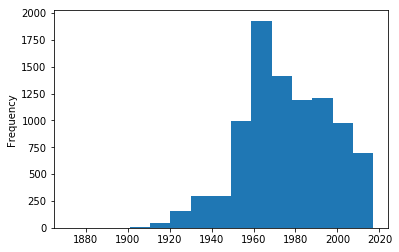

In [8]:
data['AGE'] = current_year - data['YEAR_BUILT_027']
data['YEAR_BUILT_027'].plot(kind='hist',bins=15)

In [9]:
data.AGE.describe()

count    9198.000000
mean       41.381931
std        21.395724
min         0.000000
25%        25.000000
50%        42.000000
75%        56.000000
max       145.000000
Name: AGE, dtype: float64

145 years old! Let's all agree to never drive over that bridge in the future. Let's see the relationship between age and sufficiency rating

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


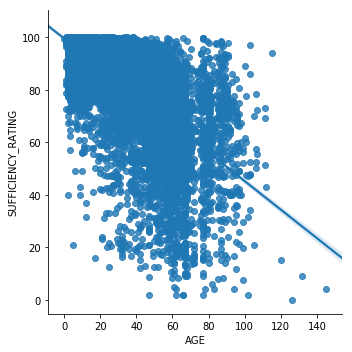

In [10]:
sns.lmplot(x='AGE',y='SUFFICIENCY_RATING',data=data)
plt.show()

Not much information here, other than a weaker relationship than I originally thought. We will group by year and take the average sufficiency rating, then visualize.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


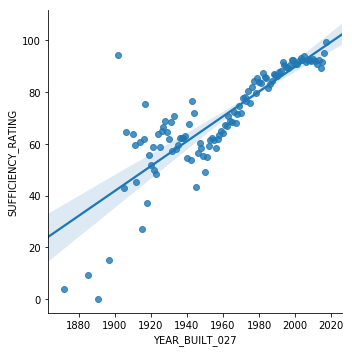

In [11]:
suff_data = data.groupby('YEAR_BUILT_027').mean()['SUFFICIENCY_RATING']
suff_data = suff_data.reset_index()
sns.lmplot(x='YEAR_BUILT_027',y='SUFFICIENCY_RATING',data=suff_data)

Perhaps we should exclude bridges built before ASTM standards were in place, to normalize the data, because
bridges built before then would have had inconsistent standards for material acceptance in the bridge.
ASTM was officially founded in 1898, so if we choose a cutoff of 1900 to allow for adoption of the standard,
then our dataset will be improved

In [12]:
data['STRUCTURE_LEN_MT_049'].head()

0    30.2
1     6.7
2    19.8
3    24.7
4    30.9
Name: STRUCTURE_LEN_MT_049, dtype: float64